My implementation of the Smith-Waterman Algorithm for aligning DNA sequences

In [33]:
import sys, getopt, numpy


file = "sampleDNAsequences.txt"


#input values here
match = 1
mismatch = -10
indel = -5



In [34]:


def getLocAL(seq1, seq2, matchS, mismatchS, indel):
    matchScore = matchS
    mismatchScore =  mismatchS
    indel = int(indel)
    
    
    vert = numpy.empty((len(seq2)+1, len(seq1)+1))
    vert[:] = 0

    d = 1
    while d < len(vert):
        vert[d][0] = indel*d
        d+=1

    d=1
    while d < len(vert[0]):
        vert[0][d] = -float("inf")
        d+=1

    vert [0][0] = 0


    #hori = deletion
    hori = numpy.empty((len(seq2)+1, len(seq1)+1))
    hori[:] = 0
    d=1
    while d < len(hori[0]):
        hori[0][d] = indel*d
        d+=1

    d=1
    while d < len(hori):
        hori[d][0] = -float("inf")
        d+=1
    hori[0][0]=0

    #diag = match or mismatch
    diag = numpy.empty((len(seq2)+1, len(seq1)+1))
    diag[:] = 0
    d=1
    while d < len(diag[0]):
        diag[0][d] = indel*d
        d+=1
    d=1
    while d < len(diag):
        diag[d][0] = indel*d
        d+=1
    diag [0][0] = 0

    #score for scorekeeping
    score = numpy.empty((len(seq2)+1, len(seq1)+1))
    score[:] = numpy.NAN

    d=1
    while d < len(score[0]):
        score[0][d] = 0
        d+=1
    d=1
    while d < len(score):
        score[d][0] = 0
        d+=1
    score [0][0] = 0

    #1 = Vert, 2 = Horiz, 3 = diag

    dire = numpy.empty((len(seq2)+1, len(seq1)+1))
    d=1
    while d < len(dire[0]):
        dire[0][d] = 2
        d+=1
    d=1
    while d < len(dire):
        dire[d][0] = 1
        d+=1
    
    # here we going to loop through the whole thing and go from top left to bottom right


    #let's make a variable to keep track of the biggest score value:
    maxScore = 0
    bestLoc = (0,0)
    # we want to iterate 1-10 in the 3 matrices. This is the nested for loop
    i = 1
    while i < len(diag):
        j=1
        while j < len(diag[i]):
            #print ('current i and j: ', i , ' ', j)
            #we gotta manipulate each matrix we're working with

            #Vertical
            a = vert[i-1][j]
            b = diag[i-1][j]

            if a>=b:
                vert[i][j] = a + indel
            elif b>=a:
                vert[i][j] = b + indel


            #Horizontal
            a = hori[i][j-1]
            b = diag[i][j-1]

            if a>=b:
                hori[i][j] = a + indel
            elif b>=a:
                hori[i][j] = b + indel

            #diag


            a = vert[i][j]
            b = hori[i][j]

            #print((seq1[j-1],seq2[i-1]))

            if(int(seq1[j-1]==seq2[i-1]) ==0):
                cScore = mismatchScore
            else:
                cScore = matchScore

            c = diag[i-1][j-1] + cScore


            if a>=b and a>=c:
                dire[i][j] = "1"
                diag[i][j]=a
            if b>=a and b>=c:
                dire[i][j] = "2"
                diag[i][j]=b
            if c>=a and c>=b:
                dire[i][j] = "3"
                diag[i][j]=c 
            if diag[i][j]<0:
                dire[i][j] = 0
                diag[i][j] = 0

            if(diag[i][j] >= maxScore):
                maxScore = diag[i][j]
                bestLoc = (i,j)

            j+=1

        i+=1




    # run this if -a is on
    #reset directional borders to zero:
    d=1
    while d < len(dire[0]):
        dire[0][d] = 0
        d+=1
    d=1
    while d < len(dire):
        dire[d][0] = 0
        d+=1


    # let's write a function to find the local alignment


    ali1 = "" 
    #print(seq1)
    #print(seq1[bestLoc[1]-1])

    #remember seq2 is the y value but is presented first in the coordinates
    ali2 = ""
    #print(seq2)
    #print(seq2[bestLoc[0]-1])




    k = 0
    current = bestLoc
    while k == 0:

        #on zero we stop
        if dire[bestLoc] == 0:
            k=1
        #on 1 we go up. so i changes but j stays the same
        elif dire[bestLoc] == 1:
            bestLoc = (bestLoc[0]-1, bestLoc[1])
            ali1 = ali1 + "-"
            ali2 = ali2 + str(seq2[bestLoc[0]])
        #on 2 we go left so j changes but i stays constant
        elif dire[bestLoc] == 2:
            bestLoc = (bestLoc[0], bestLoc[1]-1)
            ali2 = ali2 + "-"
            ali1 = ali1 = ali1 + str(seq1[bestLoc[1]])
        #on 3 both change, yay!
        elif dire[bestLoc] == 3:
            bestLoc = (bestLoc[0]-1, bestLoc[1]-1)
            ali1 = ali1 + str(seq1[bestLoc[1]])
            ali2 = ali2 + str(seq2[bestLoc[0]])

    return (len(ali1))



In [38]:
#File reader to convert the lines into an array of DNA sequences

data = open(file, "r")

lengths = []
check = False
counter = 0
seqs = []
for line in data:
    line = line[:-1]
    
    if 'seq' in line:
        check = True
    elif check == True:
        lengths.append(len(line))
        seqs.append(line)
        check = False
        counter +=1

In [39]:
#now let's write a program to run our function on all instances, 
#using a pair of DNA


randDNAcount = 0
p1 = []


while randDNAcount < (len(seqs)/2):
    p1.append(getLocAL(seqs[randDNAcount*2], seqs[randDNAcount*2+1], match, mismatch, indel))
    print('Processing DNA pair number ', (randDNAcount+1))
    randDNAcount+=1
    


Processing DNA pair number  1
Processing DNA pair number  2
Processing DNA pair number  3
Processing DNA pair number  4


In [40]:
print(p1)

[4, 31, 481, 999]


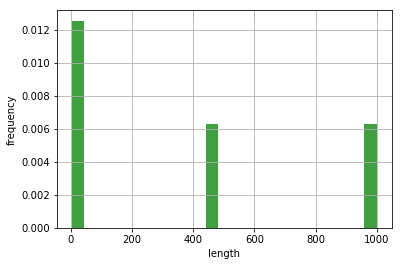

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('length')
plt.ylabel('frequency')
plt.grid(True)


n, bins, patches = plt.hist(p1,25, normed=1, facecolor='green', alpha=0.75)



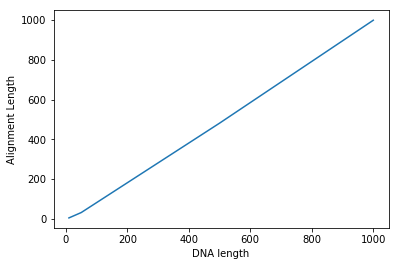

In [47]:
meanLengths = []
counter =0
for leng in lengths:
    if counter%2 ==0:
        meanLengths.append(leng)
    counter+=1
plt.xlabel('DNA length')
plt.ylabel('Alignment Length')
plt.plot(meanLengths, p1)
